# 데이터 전처리

**Table of contents**<a id='toc0_'></a>    
- [데이터 전처리](#toc1_)    
  - [정의](#toc1_1_)    
  - [데이터 전처리 종류](#toc1_2_)    
- [데이터 클리닝](#toc2_)    
  - [ 결측치 처리](#toc2_1_)    
  - [ 틀린값 처리](#toc2_2_)    
  - [실습 데이터](#toc2_3_)    
  - [결측치 처리 실습](#toc2_4_)    
- [스케일링](#toc3_)    
  - [표준 스케일링](#toc3_1_)    
    - [스케일링 이전의 원래 값으로 환원하는 방법](#toc3_1_1_)    
    - [데이터 분포 보기](#toc3_1_2_)    
  - [정규분포와 가까운가?](#toc3_2_)    
  - [Min-Max 스케일링](#toc3_3_)    
- [이상치 처리](#toc4_)    
  - [이상치 탐지](#toc4_1_)    
- [데이터 변환](#toc5_)    
  - [로그 변환](#toc5_1_)    
    - [log-normal 분포](#toc5_1_1_)    
  - [카테고리 인코딩](#toc5_2_)    
    - [키의 등급 나누기](#toc5_2_1_)    
    - [원 핫 인코딩](#toc5_2_2_)    
- [최종 사용 데이터](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[데이터 전처리](#toc0_)

## <a id='toc1_1_'></a>[정의](#toc0_)
- 데이터를 분석에 사용할 때 성능이 더 좋게 나오도록 데이터를 수정하거나 형태를 변형하는 작업
- data preprocessing

<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-07%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%204.33.49.png?raw=1" width=500  align='left'>  



## <a id='toc1_2_'></a>[데이터 전처리 종류](#toc0_)

- 데이터 클리닝 - 결측치 처리, 틀린값 처리
- 스케일링 - 여러 변수 값의 범위를 동등한 조건으로 맞추는 것: 표준 스케일링, min-max 스케일링
- 이상치 처리 - 이상치 탐지 및 제거
- 데이터 변환 - 로그 변환, 카테고리 인코딩 등

# <a id='toc2_'></a>[데이터 클리닝](#toc0_)

## <a id='toc2_1_'></a>[ 결측치 처리](#toc0_)
- 값이 비어 있는 것을 처리하는 것 (파이썬에서는 빈 값이 nan으로 표시된다: not a number)
- 결측치를 처리하는 방법은 크게 세 가지가 있다
 - 결측치가 포함된 샘플(행)을 버린다
 - 결측치를 적절한 값으로 대체한다
 - 결측치 처리를 다음 분석 단계로 넘긴다. 즉, 결측치를 그대로 둔다
 
## <a id='toc2_2_'></a>[ 틀린값 처리](#toc0_)
- 틀린값을 처리하는 방법도 결측치를 처리하는 방법과 같이 세가지이다
 - 틀린 값이 포함된 샘플(행)을 버린다
 - 틀린 값을 적절한 값으로 대체한다
 - 틀린값 처리를 다음 분석 단계로 넘긴다. 즉, 틀린값을 그대로 둔다

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# matplotlib를 이용하여 다양한 시각화 함수를 제공하는 라이브러리 seaborn
import seaborn as sns

## <a id='toc2_3_'></a>[실습 데이터](#toc0_)
- 키와 몸무게 데이터 생성
- 평균 170cm, 65kg, 표준편차 4cm, 5kg

In [7]:
n_samples = 1000
height = 4*np.random.randn(n_samples).round(2) + 170
weight = 5*np.random.randn(n_samples).round(2) + 65
df_raw = pd.DataFrame({"height": height, "weight": weight})
df_raw[:5]

,height,weight
0,168.32,62.65
1,166.12,56.95
2,163.72,63.10
3,169.28,63.20
4,161.44,71.10


In [47]:
# 사본 사용 (원본 백업)
df = df_raw.copy()

## <a id='toc2_4_'></a>[결측치 처리 실습](#toc0_)

- 결측치 확인은 np.isnull() 사용
- 결측치 치환은 np.fillna() 사용

In [49]:
df[:5]

,height,weight
0,168.32,62.65
1,166.12,56.95
2,163.72,63.10
3,169.28,63.20
4,161.44,71.10


In [50]:
# 임의의 값 하나를 결측치로 변경
df['weight'][2] = np.nan
df[:5]

,height,weight
0,168.32,62.65
1,166.12,56.95
2,163.72,NaN
3,169.28,63.20
4,161.44,71.10


In [51]:
# 컬럼별 결측치 갯수 보기
df.isnull().sum()

height    0
weight    1
dtype: int64

In [52]:
# 결측치가 있는 행(샘플) 삭제하기
df2 = df.dropna()
print(df2.shape)
df2[:5]

(999, 2)


,height,weight
0,168.32,62.65
1,166.12,56.95
3,169.28,63.20
4,161.44,71.10
5,176.76,60.65


In [53]:
# 결측치를 다른 값으로 대체하기 (아래는 몸무게 컬럼의 평균치로 대체한 예)
df3 = df.fillna(df['weight'].mean())
print(df3.shape)
print(df['weight'].mean())
df3[:5]

(1000, 2)
64.98968968968968


,height,weight
0,168.32,62.65000
1,166.12,56.95000
2,163.72,64.98969
3,169.28,63.20000
4,161.44,71.10000


In [54]:
# 결측치를 0으로 대체하는 경우
df.fillna(0)[:5]

,height,weight
0,168.32,62.65
1,166.12,56.95
2,163.72,0.00
3,169.28,63.20
4,161.44,71.10


In [55]:
# 결측치를 바로 이전 값으로 대체하는 경우 (forward fill)
df.fillna(method="ffill")[:5]

,height,weight
0,168.32,62.65
1,166.12,56.95
2,163.72,56.95
3,169.28,63.20
4,161.44,71.10


# <a id='toc3_'></a>[스케일링](#toc0_)
- 여러 변수 값의 범위가 서로 다른 경우 데이터 분석에서 동일한 비중으로 반영하기 위해서는 동일한 범위를 갖도록 변환해야 한다 (예: 과목 성적 100점 만점으로 환산)
- 표준 스케일링을 가장 많이 사용한다 (평균이 0, 표준편차가 1이 되도록 변환)
- 값의 최소치와 최대치가 정해진 경우는 min-max 스케링일도 자주 사용된다 (최소치를 0으로, 최대치를 1로 : 음수가 나오면 안될 경우)
- min-max 스케일링은 극단값이 들어올 경우 통계치가 많이 흔들린다. 이럴 가능성이 있는 데이터의 경우는 쓰지 않는 것이 좋다.

## <a id='toc3_1_'></a>[표준 스케일링](#toc0_)


<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-05%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%208.52.14.png?raw=1" width=140  align='left'>

In [56]:
# 키, 몸무게 데이터를 각각 표준 스케일링한 후 컬럼에 추가
df = df_raw.copy() # 백업 데이터 사용 (결측치 없는)
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
df[['h_sc','w_sc']]=scale.fit_transform(df[['height','weight']])
df[:5]

,height,weight,h_sc,w_sc
0,168.32,62.65,-0.401959,-0.471703
1,166.12,56.95,-0.957081,-1.621806
2,163.72,63.10,-1.562668,-0.380906
3,169.28,63.20,-0.159724,-0.360729
4,161.44,71.10,-2.137977,1.233273


In [57]:
scale.mean_, scale.scale_

(array([169.913 ,  64.9878]), array([3.96309301, 4.95607972]))

### <a id='toc3_1_1_'></a>[스케일링 이전의 원래 값으로 환원하는 방법](#toc0_)
- inverse_transform을 사용한다

In [58]:
# 원래 값 보기
scale.inverse_transform(df[["h_sc","w_sc"]])[:5]

array([[168.32,  62.65],
       [166.12,  56.95],
       [163.72,  63.1 ],
       [169.28,  63.2 ],
       [161.44,  71.1 ]])

### <a id='toc3_1_2_'></a>[데이터 분포 보기](#toc0_)

<AxesSubplot:ylabel='Density'>

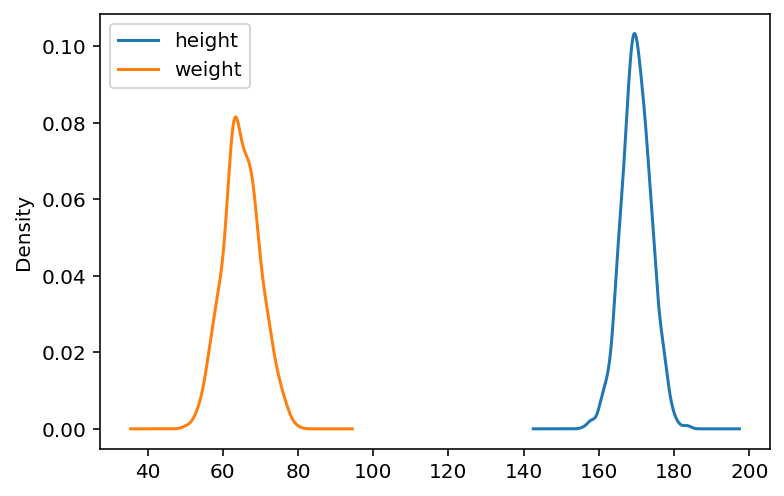

In [59]:
# 원래 키, 몸무게의 데이터의 확률 분포 보기 (kernel density estimate 함수 사용)
df[["height","weight"]].plot.kde()

## <a id='toc3_3_'></a>[Min-Max 스케일링](#toc0_)
- 데이터의 최소값이 0, 최대값이 1이 되도록 조정

In [61]:
# BACKUP ########################################
#df_origin = df.copy()
df = df_origin.copy()

In [62]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
df[['h_mima','w_mima']]=minmax.fit_transform(df[['height','weight']])
df[:5]

,height,weight,h_sc,w_sc,h_mima,w_mima
0,168.32,62.65,-0.401959,-0.471703,0.440876,0.421053
1,166.12,56.95,-0.957081,-1.621806,0.360584,0.227504
2,163.72,63.10,-1.562668,-0.380906,0.272993,0.436333
3,169.28,63.20,-0.159724,-0.360729,0.475912,0.439728
4,161.44,71.10,-2.137977,1.233273,0.189781,0.707980


<AxesSubplot:ylabel='Density'>

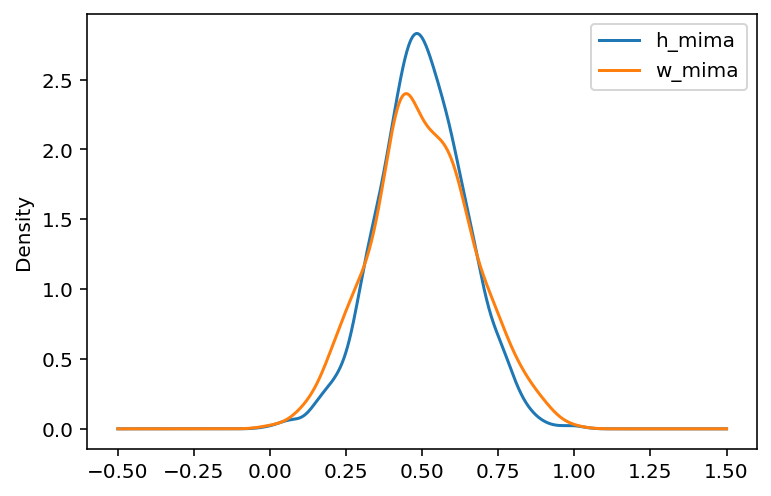

In [63]:
# min-max 스케일링 된 데이터의 확률 분포
df[["h_mima","w_mima"]].plot.kde()

- 위의 결과를 보면 표준 스케일링과 min-max 스케일링이 별 차이가 없다
- 그러나 이상치가 있을 때는 두 스케일링 결과 값의 변화 정도가 크게 다르다

In [64]:
# 이상치가 포함된 키 데이터 생성: height_1
# 첫번째 샘플의 키 값을 임의로 2m로 변경 (200)
height_1 = height.copy()
height_1[0] = 200

In [65]:
df["height_1"] = height_1
df[:3]

,height,weight,h_sc,w_sc,h_mima,w_mima,height_1
0,168.32,62.65,-0.401959,-0.471703,0.440876,0.421053,200.00
1,166.12,56.95,-0.957081,-1.621806,0.360584,0.227504,166.12
2,163.72,63.10,-1.562668,-0.380906,0.272993,0.436333,163.72


In [68]:
# 이상치가 포함된 데이터(컬럼)에 표준 스케일링을 적용
#df['h_1_sc']=scale.fit_transform(df[['height_1']]) ==> dl
df[['h_mima','w_mima']]=scale.transform(df[['height_1','weight']])
df[:3]

,height,weight,h_sc,w_sc,h_mima,w_mima,height_1
0,168.32,62.65,-0.401959,-0.471703,7.591798,-0.471703,200.00
1,166.12,56.95,-0.957081,-1.621806,-0.957081,-1.621806,166.12
2,163.72,63.10,-1.562668,-0.380906,-1.562668,-0.380906,163.72


<AxesSubplot:ylabel='Density'>

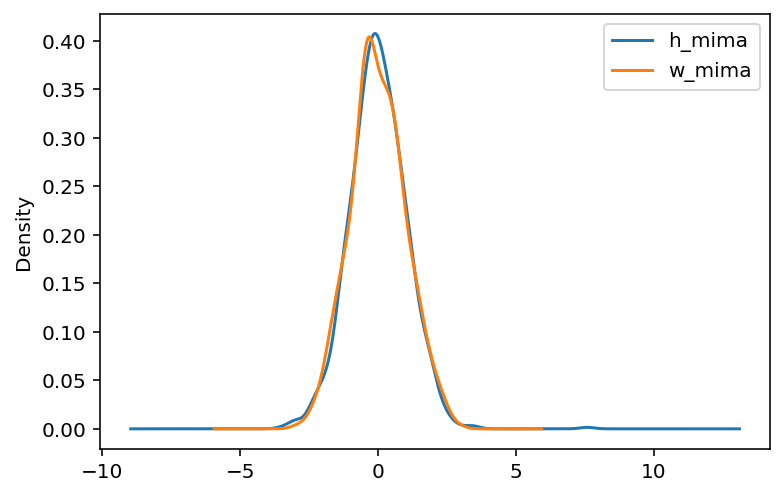

In [70]:
# 이상치가 있더라도 "표준 스케일링" 데이터의 다른 값의 분포는 거의 변화가 없다
# 한 샘플 추가로 인해 전체 평균과 표준편차가 거의 변하지 않으므로
df[['h_mima','w_mima']].plot.kde()

In [73]:
# 이상치가 있는 데이터에 nim-max 스케일링을 적용
#df['h_1_mima']=minmax.fit_transform(df[['height_1']]) ==> 이 것이 중요한 이유는 극단값이 들어왔을 때 scaling을, 즉 fitting을 다시 할 것인가의 문제이기 때문. 
#==> fitting을 안하고 그대로 유지하려면 transform만 하면 된다. 
df[['h_mima','w_mima']]=minmax.transform(df[['height_1','weight']])
df[:3]

,height,weight,h_sc,w_sc,h_mima,w_mima,height_1
0,168.32,62.65,-0.401959,-0.471703,1.597080,0.421053,200.00
1,166.12,56.95,-0.957081,-1.621806,0.360584,0.227504,166.12
2,163.72,63.10,-1.562668,-0.380906,0.272993,0.436333,163.72


<AxesSubplot:ylabel='Density'>

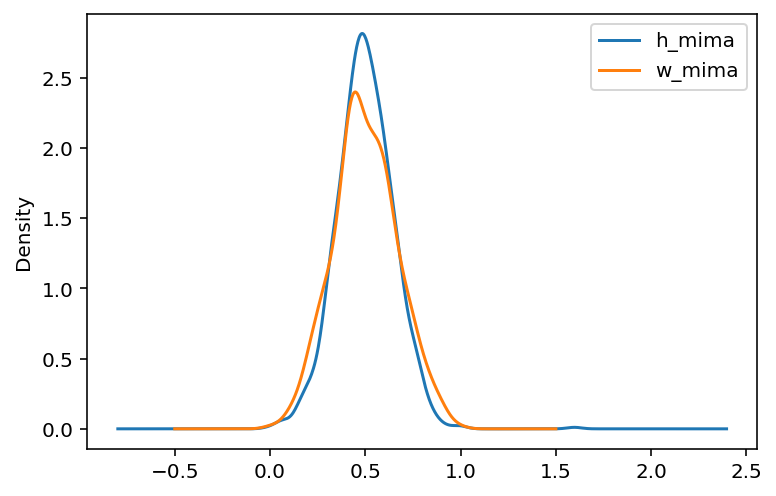

In [77]:
# 이상치 하나 때문에 min-max 스케일링 데이터의 다른 값들이 크게 달라진다
# 크거나 작은 단 한개의 샘플 추가로도 다른 샘플들의 값이 크게 달라질 수 있다
# 여기서는 200인 키의 값이 1로 환산되었다

df[['h_mima','w_mima']].plot.kde()

# <a id='toc4_'></a>[이상치 처리](#toc0_)
- 이상치 처리의 목적은 두가지 이다
 - 1) 이상치를 제거하여 데이터 분석의 정확도를 높이려는 경우
 - 2) 이상치를 찾는 것 자체가 목적인 경우 (outlier detection)  
 
- 아래는 모두 같은 상관계수를 같는 데이터 셋이다

<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-03%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%201.47.02.png?raw=1" width=400 align='left'>

## <a id='toc4_1_'></a>[이상치 탐지](#toc0_)
 - boxplot()을 보면 이상치 존재를 파악하기 쉽다
 - 표준 스케일링 한 후 값이 큰 것들 (예 6 이상)을 찾는 방법이 일반적이다

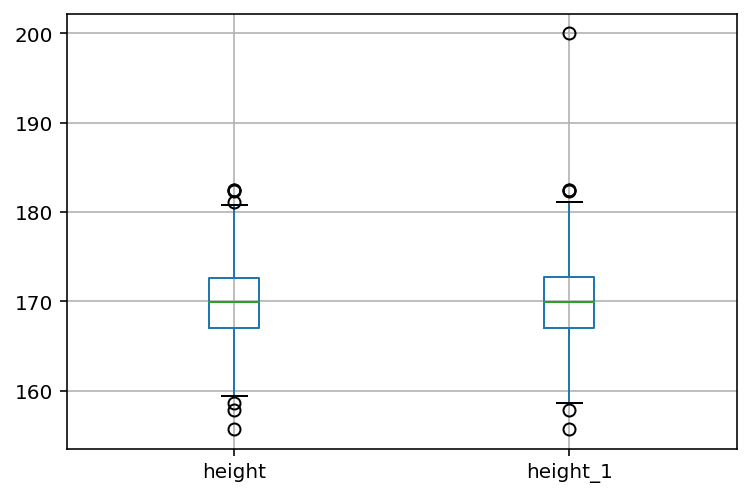

In [26]:
# 이상치가 없는 경우와 있는 경우의 박스 플롯
df[["height", "height_1"]].boxplot()

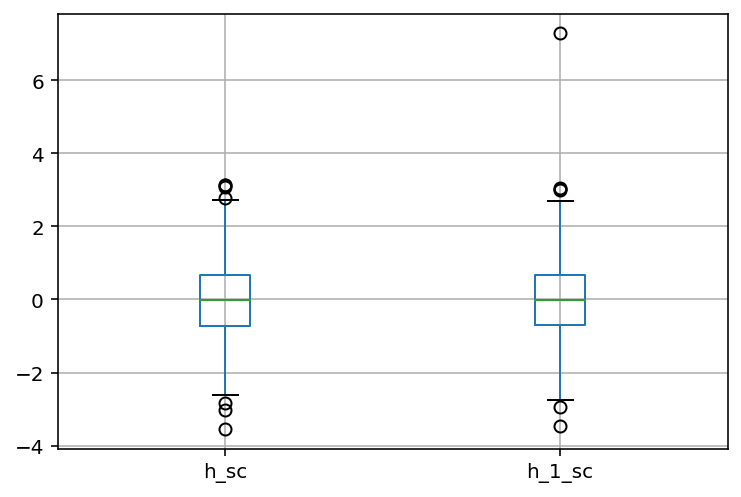

In [27]:
# 스케일링된 데이터를 비교하기 (키 2m인 사람은 7 시그마 밖에 존재: 4cm x 7 = 28cm)
df[["h_sc", "h_1_sc"]].boxplot()

# <a id='toc5_'></a>[데이터 변환](#toc0_)
## <a id='toc5_1_'></a>[로그 변환](#toc0_)

- 어떤 변수는 로그를 취해야 입출력 관계에서 선형적인 변화(효과)를 표현하는 경우가 있다
- 예: 돈, 생물학적 자극과 반응 관계 (청각, 미각, 후각, 압력 등)
- 데이터 분석에서는 입출력 관계가 선형적일 때 가장 잘 예측할 수 있다 (선형적일수록 예측이 잘 된다)

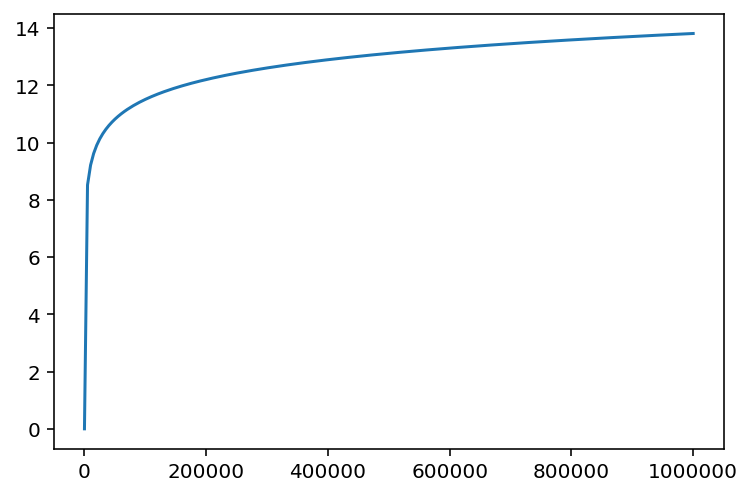

In [28]:
# 돈의 수입과 만족도의 관계는 대체로 로그 함수를 따른다 (생물학적 반응)
# (해석) 로그 함수의 기울기는 1/x 이다. 즉 만족도 증가는 현재 가진 돈의 크기에 반비례한다
x = np.linspace(1,1000000, 200)
y = np.log(x)
plt.plot(x,y)

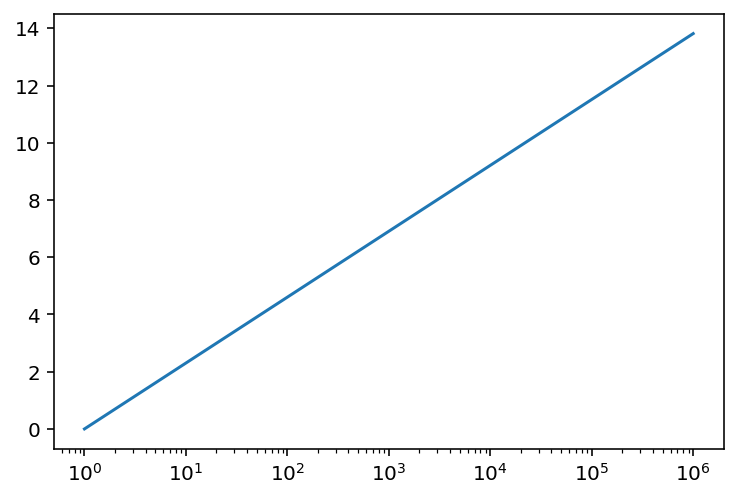

In [29]:
# x 축을 로그 스케일로 그리면 (로그를 취하면) 입출력 관계가 선형적이 된다
plt.xscale('log')
plt.plot(x,y)

### <a id='toc5_1_1_'></a>[log-normal 분포](#toc0_)

- 어떤 값에 로그를 취하면 정규분포를 갖는 특성의 데이터 (예: 국가별 수출액 분포)


<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-03%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%201.49.30.png?raw=1" width=400 align='left'>

## <a id='toc5_2_'></a>[카테고리 인코딩](#toc0_)

- 연속형 숫자 데이터를 카테고리형(범주형)으로 바꾸는 것
- (예) 시험점수, 등수 차이만으로는 학생의 실력 차이를 파악하기 어렵다
 - 3점 차이
 - 3등 차이
 - 3등급 차이 (등급 차이는 실력차이를 선형적으로 표현한다)
 - 학생들의 점수별 분포가 정규분포를 따른다고 할 때 등간격 구분으로 등급을 매기게 된다.
 - 이 때, 한 등급을 올리려면, 학생 수가 많은 등급일 수록 많은 등수를 올려야 한다. 학생수가 많은 등급 내에서는 등수가 많이 올라봐야 점수차는 거의 없는 것.

- 입력 값의 변화가 선형적(linear)인 효과를 나타낼 때 예측에 도움이 된다
- 내신성적 9등급제는 정규분포를 0.5 시그마 간격으로 (등간격으로) 나눈 것 (총 4.5 시그마 범위)


<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-03%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%201.48.55.png?raw=1" width=400 align='left'>

### <a id='toc5_2_1_'></a>[키의 등급 나누기](#toc0_)

In [30]:
# 키를 세 등급으로 나누는 방법 (표준편차를 기준으로)
df.loc[df['height'] >= 174, 'tall'] = 'large'
df.loc[(df['height'] < 174)&(df['height'] >= 166), 'tall'] = 'standard'
df.loc[df['height'] < 166, 'tall'] = 'small'
df

,height,weight,h_sc,w_sc,h_mima,w_mima,height_1,h_1_sc,h_1_mima,tall
0,167.40,60.85,-0.631544,-0.853114,0.435821,0.388693,200.00,7.284605,1.000000,standard
1,174.12,57.45,1.043162,-1.553029,0.686567,0.268551,174.12,1.007374,0.415537,large
2,163.84,66.50,-1.518739,0.309980,0.302985,0.588339,163.84,-1.486054,0.183379,small
3,172.44,70.40,0.624486,1.112824,0.623881,0.726148,172.44,0.599888,0.377597,standard
4,167.16,65.15,-0.691355,0.032073,0.426866,0.540636,167.16,-0.680784,0.258356,standard
...,...,...,...,...,...,...,...,...,...,...
995,170.72,64.00,0.195841,-0.204663,0.559701,0.500000,170.72,0.182699,0.338753,standard
996,178.20,57.35,2.059948,-1.573615,0.838806,0.265018,178.20,1.996984,0.507678,large
997,165.52,64.40,-1.100063,-0.122320,0.365672,0.514134,165.52,-1.078568,0.221319,small
998,170.20,67.55,0.066251,0.526130,0.540299,0.625442,170.20,0.056573,0.327010,standard


In [31]:
# 카테고리 데이터의 구성비
df['tall'].value_counts()

standard    679
small       165
large       156
Name: tall, dtype: int64

In [32]:
# 구성 비율(%)
df['tall'].value_counts()*100/len(df)

standard    67.9
small       16.5
large       15.6
Name: tall, dtype: float64

### <a id='toc5_2_2_'></a>[원 핫 인코딩](#toc0_)
- 카테고리 변수는 일반적으로 원핫(one-hot) 인코딩으로 표현해야 계산에 사용하기 쉽다
 - 데이터 분석에서는 모든 카테고리 데이터('large', 'standard' 등)를 숫자로 바뀌어야 한다
- pd.get_dummies() 사용

In [33]:
# 카테고리 변수의 원핫 인코딩 (데이터프레임을 만든다)
df_tall = pd.get_dummies(df['tall'])
df_tall[:5]

,large,small,standard
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,0,1


In [34]:
# 원핫 인코딩된 데이터프레임 합치기 (가로 방향)
df_all = pd.concat((df, df_tall), axis=1)
df_all[:5]

,height,weight,h_sc,w_sc,h_mima,w_mima,height_1,h_1_sc,h_1_mima,tall,large,small,standard
0,167.40,60.85,-0.631544,-0.853114,0.435821,0.388693,200.00,7.284605,1.000000,standard,0,0,1
1,174.12,57.45,1.043162,-1.553029,0.686567,0.268551,174.12,1.007374,0.415537,large,1,0,0
2,163.84,66.50,-1.518739,0.309980,0.302985,0.588339,163.84,-1.486054,0.183379,small,0,1,0
3,172.44,70.40,0.624486,1.112824,0.623881,0.726148,172.44,0.599888,0.377597,standard,0,0,1
4,167.16,65.15,-0.691355,0.032073,0.426866,0.540636,167.16,-0.680784,0.258356,standard,0,0,1


# <a id='toc6_'></a>[최종 사용 데이터](#toc0_)
- 여러가지 전처리된 데이터 컬럼중에서 필요한 부분만 선택하여 최종 데이터 분석에 사용한다
- 예를 들어 아래와 같이 일부 컬럼만 선택할 수 있다

In [35]:
# 모든 컬럼명 보기
df_all.columns

Index(['height', 'weight', 'h_sc', 'w_sc', 'h_mima', 'w_mima', 'height_1',
       'h_1_sc', 'h_1_mima', 'tall', 'large', 'small', 'standard'],
      dtype='object')

In [37]:
# 분석에 사용할 컬럼들을 선택
X = df_all[['h_sc', 'w_sc', 'large', 'small', 'standard']]
X[:5]

,h_sc,w_sc,large,small,standard
0,-0.631544,-0.853114,0,0,1
1,1.043162,-1.553029,1,0,0
2,-1.518739,0.309980,0,1,0
3,0.624486,1.112824,0,0,1
4,-0.691355,0.032073,0,0,1
